In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
print(iris['target_names'])


['setosa' 'versicolor' 'virginica']


In [7]:
dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X, y)

DecisionTreeClassifier(random_state=10)

In [8]:
tree_text_display = export_text(dt_classifier, feature_names=iris['feature_names'])
print(f"The tree structure is : \n\n {tree_text_display}")

The tree structure is : 

 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



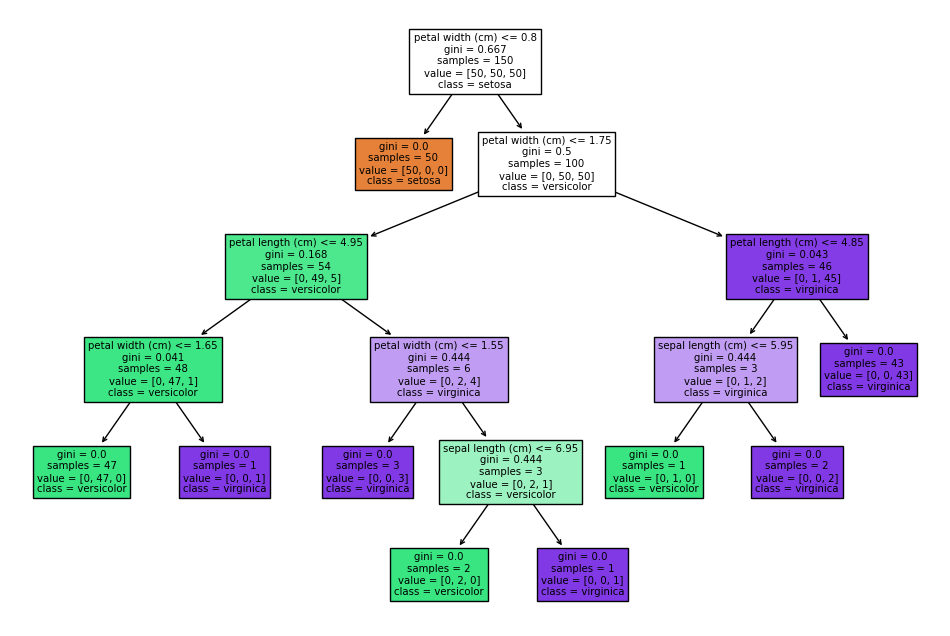

In [15]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.show()


In [17]:
#Split the data 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

lets calculate the training and testing accuracy for the criterion entropy

In [36]:
training_scoresentropy = []
testing_scoresentropy = []
training_scoresgini = []
testing_scoresgini = []
max_depths = range(1,8)

for criterion in ['entropy', 'gini']:
    for depth in max_depths:
        tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        tree.fit(X_train, y_train)
        train_pred = tree.predict(X_train)
        test_pred = tree.predict(X_test)
        if criterion == 'entropy':
          training_scoresentropy.append(np.mean(train_pred == y_train))
          testing_scoresentropy.append(np.mean(test_pred == y_test))
        else :
          training_scoresgini.append(np.mean(train_pred == y_train))
          testing_scoresgini.append(np.mean(test_pred == y_test))


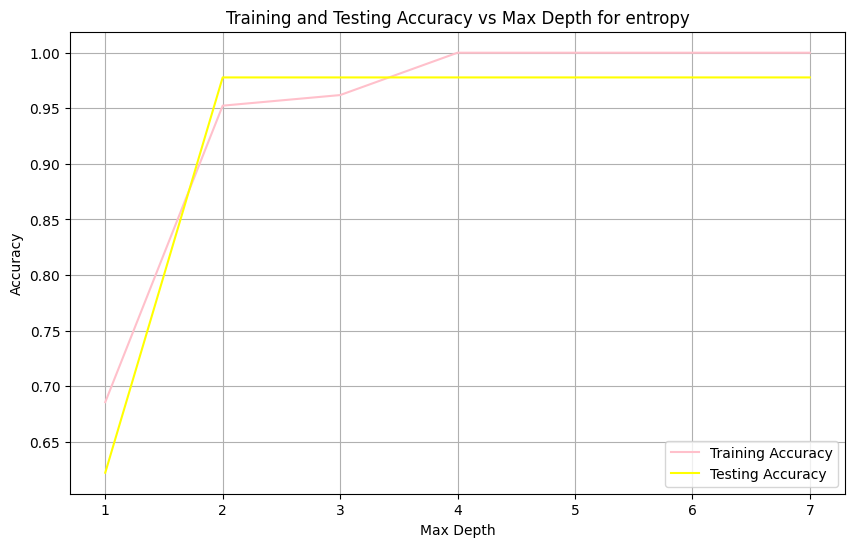

In [37]:
#plot the training and testing scores vs the max depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_scoresentropy, label='Training Accuracy',color='pink')
plt.plot(max_depths, testing_scoresentropy, label='Testing Accuracy',color='yellow')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('Training and Testing Accuracy vs Max Depth for entropy')
plt.legend()
plt.show()

REMARK : we observe that for the training accuracy it needs a max depth of 4 while the Testing accuracy needs a max depth of 2 in the context of  taking the criterion entropy

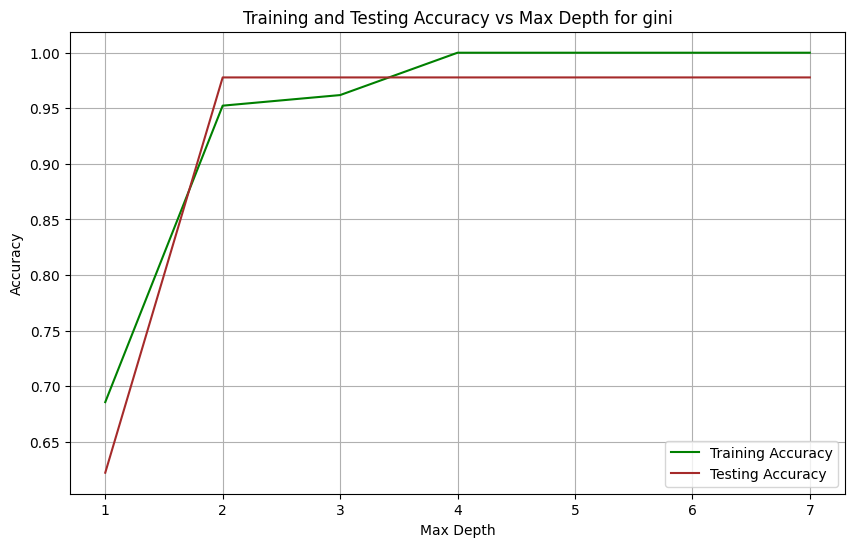

In [38]:
#plot the training and testing scores vs the max depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_scoresgini, label='Training Accuracy',color='green')
plt.plot(max_depths, testing_scoresgini, label='Testing Accuracy',color='brown')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('Training and Testing Accuracy vs Max Depth for gini')
plt.legend()
plt.show()

In [44]:
#searching for the best params
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 10)
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


Excercice 2

In [39]:
data = {
    "Pixel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Texture": [
        "Medium",
        "Fine",
        "Coarse",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Medium",
        "Coarse",
        "Fine",
        "Coarse",
        "Coarse",
        "Fine",
    ],
    "Elevation": [
        "High",
        "Low",
        "Low",
        "Medium",
        "High",
        "High",
        "Medium",
        "High",
        "Low",
        "Medium",
        "Low",
        "Low",
        "Medium",
        "High",
        "Medium",
        "High",
    ],
    "Tone": [
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Light",
        "Dark",
        "Dark",
        "Light",
    ],
     "Pattern": [
        "Definite",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Vague",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
    ],
     "Land Cover": [
        "Grassland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Grassland",
    ],
}
print(data)

{'Pixel': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'Texture': ['Medium', 'Fine', 'Coarse', 'Fine', 'Coarse', 'Medium', 'Fine', 'Coarse', 'Medium', 'Fine', 'Medium', 'Coarse', 'Fine', 'Coarse', 'Coarse', 'Fine'], 'Elevation': ['High', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium', 'High', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'High', 'Medium', 'High'], 'Tone': ['Dark', 'Light', 'Dark', 'Light', 'Dark', 'Dark', 'Light', 'Dark', 'Dark', 'Light', 'Dark', 'Light', 'Light', 'Dark', 'Dark', 'Light'], 'Pattern': ['Definite', 'Vague', 'Definite', 'Definite', 'Vague', 'Definite', 'Vague', 'Definite', 'Vague', 'Definite', 'Vague', 'Vague', 'Vague', 'Definite', 'Definite', 'Vague'], 'Land Cover': ['Grassland', 'Grassland', 'Woodland', 'Woodland', 'Woodland', 'Woodland', 'Grassland', 'Woodland', 'Woodland', 'Woodland', 'Grassland', 'Woodland', 'Grassland', 'Woodland', 'Woodland', 'Grassland']}


In [41]:
import pandas as pd
data = pd.DataFrame(data)
data

,Pixel,Texture,Elevation,Tone,Pattern,Land Cover
0,1,Medium,High,Dark,Definite,Grassland
1,2,Fine,Low,Light,Vague,Grassland
2,3,Coarse,Low,Dark,Definite,Woodland
3,4,Fine,Medium,Light,Definite,Woodland
4,5,Coarse,High,Dark,Vague,Woodland
5,6,Medium,High,Dark,Definite,Woodland
6,7,Fine,Medium,Light,Vague,Grassland
7,8,Coarse,High,Dark,Definite,Woodland
8,9,Medium,Low,Dark,Vague,Woodland
9,10,Fine,Medium,Light,Definite,Woodland


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pixel       16 non-null     int64 
 1   Texture     16 non-null     object
 2   Elevation   16 non-null     object
 3   Tone        16 non-null     object
 4   Pattern     16 non-null     object
 5   Land Cover  16 non-null     object
dtypes: int64(1), object(5)
memory usage: 896.0+ bytes


we will first need to convert the categorical features into numerical format because decision trees in scikit-learn require numerical input.

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

data

,Pixel,Texture,Elevation,Tone,Pattern,Land Cover
0,1,2,0,0,0,0
1,2,1,1,1,1,0
2,3,0,1,0,0,1
3,4,1,2,1,0,1
4,5,0,0,0,1,1
5,6,2,0,0,0,1
6,7,1,2,1,1,0
7,8,0,0,0,0,1
8,9,2,1,0,1,1
9,10,1,2,1,0,1


In [58]:
#Specifying the data into Features X and target Variable Y
X = data.drop(['Land Cover','Pixel'], axis=1)
y = data['Land Cover']

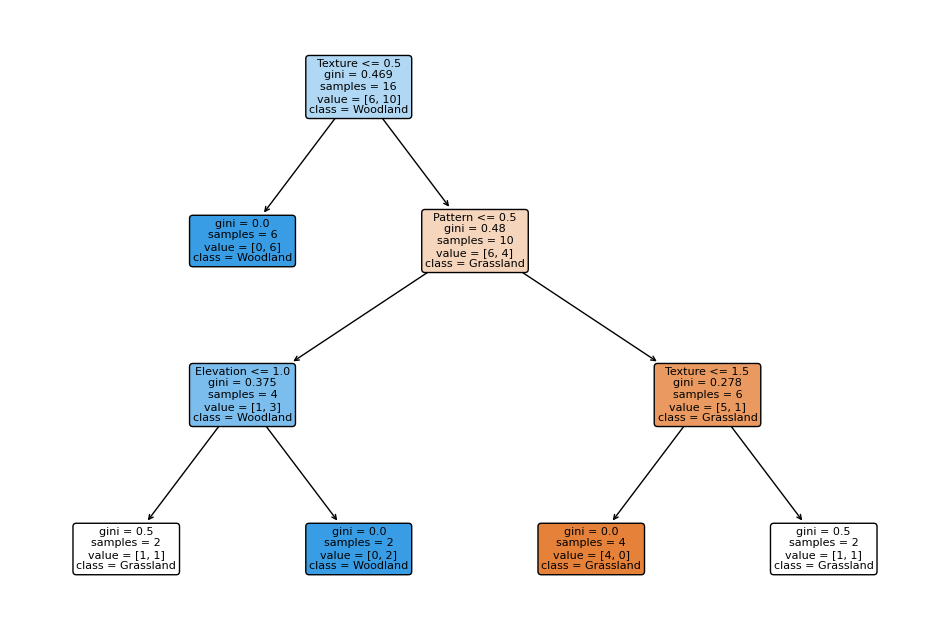

In [59]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(dtc1,
          feature_names=X.columns,
          class_names=['Grassland', 'Woodland'],
          filled=True,
          fontsize=8,
          rounded=True)
plt.show()